In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


(1338, 7)

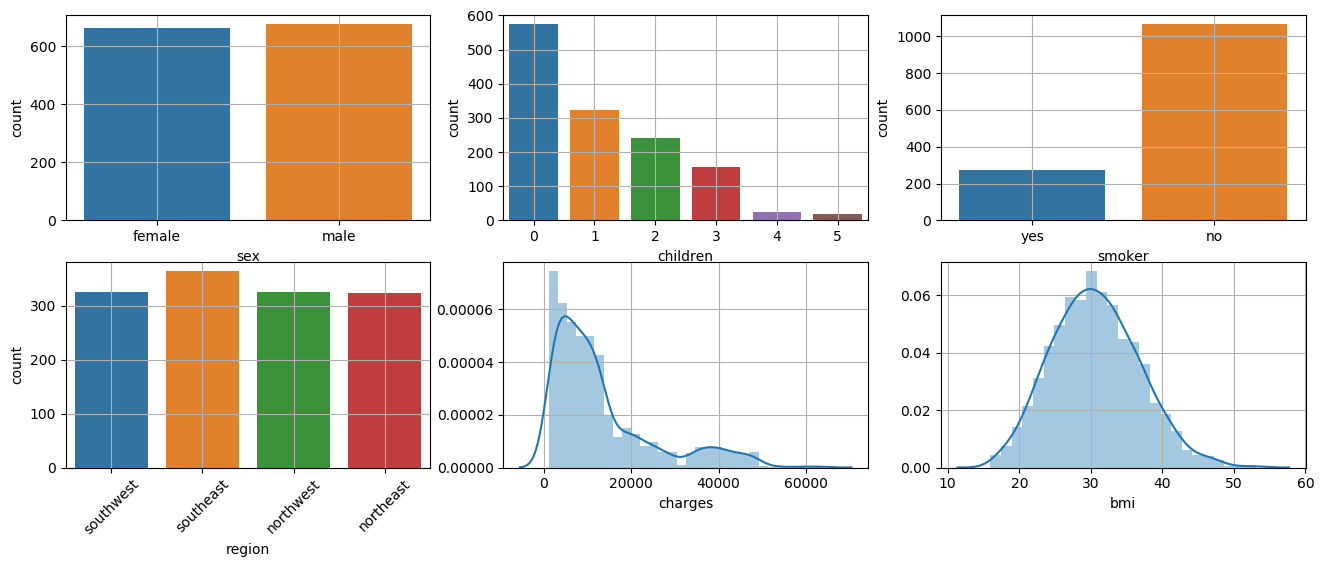

In [4]:
plt.figure(figsize=(16,6), dpi=100)

plt.subplot(2,3,1)
sns.countplot(df.sex)
plt.grid()

plt.subplot(2,3,2)
sns.countplot(df.children)
plt.grid()

plt.subplot(2,3,3)
sns.countplot(df.smoker)
plt.grid()

plt.subplot(2,3,4)
sns.countplot(df.region)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(2,3,5)
sns.distplot(df.charges)
plt.grid()

plt.subplot(2,3,6)
sns.distplot(df.bmi)
plt.grid();

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Cinsiyetlere göre ortalama yaş nedir?
display(pd.DataFrame(df.groupby(["sex"])["age"].mean()).reset_index())

# Cinsiyetelere göre ortalama bmi nedir?
display(pd.DataFrame(df.groupby(["sex"])["bmi"].mean().reset_index()))

# Sigara içip içmemesine göre ortalama bmi değeri nedir?
display(pd.DataFrame(df.groupby(["smoker"])["bmi"].mean().reset_index()))

# Bölgelere göre ortalama bmi değeri nedir?
display(pd.DataFrame(df.groupby(["children"])["bmi"].median().reset_index()))

# Sigara içip içmemesine göre ortalama charge değeri nedir?
display(pd.DataFrame(df.groupby(["smoker"])["charges"].mean().reset_index()))

# Bölgelere göre ortalama charge miktarı?
display(pd.DataFrame(df.groupby(["region"])["charges"].median().reset_index()))

# sex ve smoker kolonlarına göre ortalama bmi?
display(pd.DataFrame(df.groupby(["sex","smoker"])["bmi"].mean().reset_index()))

,sex,age
0,female,39.503021
1,male,38.917160


,sex,bmi
0,female,30.377749
1,male,30.943129


,smoker,bmi
0,no,30.651795
1,yes,30.708449


,children,bmi
0,0,30.3025
1,1,30.0150
2,2,31.6400
3,3,30.4950
4,4,29.6400
5,5,28.5500


,smoker,charges
0,no,8434.268298
1,yes,32050.231832


,region,charges
0,northeast,10057.652025
1,northwest,8965.795750
2,southeast,9294.131950
3,southwest,8798.593000


,sex,smoker,bmi
0,female,no,30.539525
1,female,yes,29.608261
2,male,no,30.770580
3,male,yes,31.504182


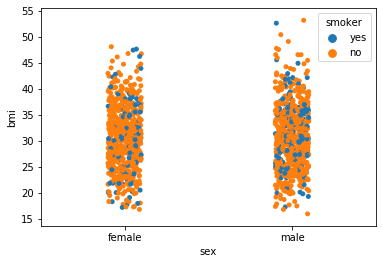

In [7]:
sns.stripplot(x=df.sex, y=df.bmi, hue=df.smoker, data=df);

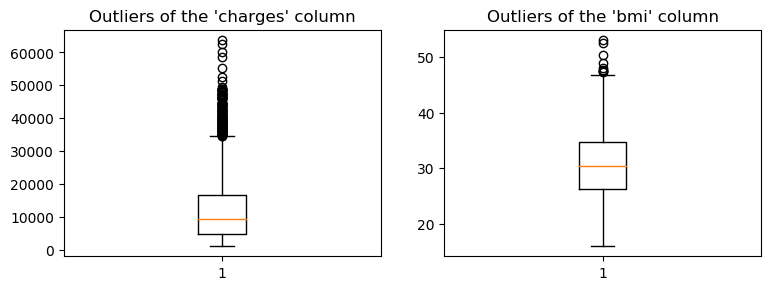

In [8]:
plt.figure(figsize=(9,3), dpi=100)
plt.subplot(1,2,1)
plt.title("Outliers of the 'charges' column")
plt.boxplot(df.charges)

plt.subplot(1,2,2)
plt.title("Outliers of the 'bmi' column")
plt.boxplot(df.bmi);

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


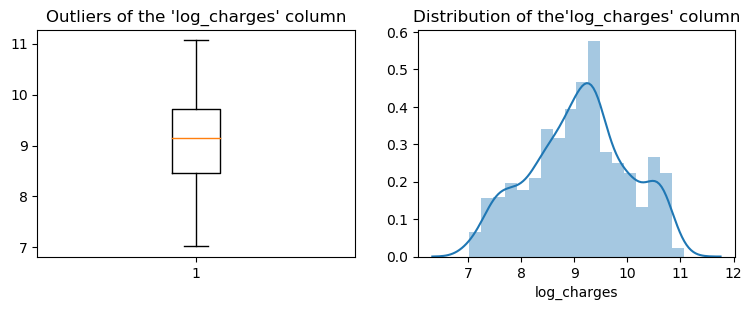

In [9]:
df["log_charges"]=np.log(df.charges)

display(df.head())

plt.figure(figsize=(9,3), dpi=100)
plt.subplot(1,2,1)
plt.title("Outliers of the 'log_charges' column")
plt.boxplot(df.log_charges)

plt.subplot(1,2,2)
plt.title("Distribution of the'log_charges' column")
sns.distplot(df.log_charges);

In [10]:
df.sex=pd.get_dummies(df.sex, drop_first=True)
df.smoker=pd.get_dummies(df.smoker, drop_first=True)
df.region=pd.get_dummies(df.region, drop_first=True)

df.head(3)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.90,0,1,0,16884.9240,9.734176
1,18,1,33.77,1,0,0,1725.5523,7.453302
2,28,1,33.00,3,0,0,4449.4620,8.400538


In [11]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.000407,0.299008,0.527834
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.011156,0.057292,0.005632
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.135996,0.198341,0.132669
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.024806,0.067998,0.161336
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.036945,0.787251,0.665506
region,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,1.000000,-0.039905,-0.017824
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039905,1.000000,0.892964
log_charges,0.527834,0.005632,0.132669,0.161336,0.665506,-0.017824,0.892964,1.000000


In [12]:
# Hedef değişken "charges" kolonudur, ancak modeli önce charges kolonunu hedef değişken alarak çalıştıracağım, sonra da log_charges kolonunu hedef değişken yapacağım; 
# böylece normal dağılıma daha yakın olan log_charges kolonunun doğruluğu ile mevcuttaki outliers içeren hedef değişkenin doğruluğu arasında fark olup olmadığını test edeceğim.

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [13]:
X=df.drop(["charges", "log_charges"], axis=1)
Y=df.charges

In [15]:
lr=LinearRegression()

lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
X=sm.add_constant(X)

result=sm.OLS(Y,X).fit()

result.summary()

C:\Users\afran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     664.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:23:10   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.221e+04    973.142    -12.546      0.000   -1.41e+04   -1.03e+04
age          257.6201     11.907     21.637      0.000     234.262     280.978
sex         -128.0694    333.413     -0.384      0.701    -782.141     526.003
bmi          325.2642     27.682     11.750      0.000     270.958     379.570
children     471.5998    137.926      3.419      0.001     201.024     742.176
smoker      2.383e+04    412.861     57.731      0.000     2.3e+04    2.46e+04
region       299.8846    391.076      0.767      0.443    -467.307    1067.076
==============================================================================
Omnibus:                      300.340   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.014
Skew:                           1.213   Prob(JB):                    3.31e-156
Kurtosis:                       5.638   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Modeldeki her bir katsayının p değerlerine baktığımızda "sex" ve "region" kolonlarının p>0.05 olduğu için bu kolonlar hedef değişkeni açıklamada anlamlı değildir diyebiliriz;
# Dolayısıyla, model tahminlemesinde age,bmi,children, smoker kolonlarını alabiliriz. Bir de böyle deneyelim:

X=df[["age","bmi","children","smoker"]]
Y=df.charges

In [18]:
lr1=LinearRegression()
lr1.fit(X,Y)

X=sm.add_constant(X)
result2=sm.OLS(Y,X).fit()

result2.summary()

C:\Users\afran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:23:43   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker      2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# sex ve region değişkenlerini modelden çıkarmak, hedef değişkeninin doğruluğunu değiştirmemiştir. Şimdi de hedef değişkeni için log_charges kolonunu alarak modelin doğruluğuna bakalım.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
# Modelin Adj R-squared değerinden de görüldüğü gibi accuracy %76,1 olmuştur, yani outliers içeren hedef değişkenin modeline göre doğruluk %1 oranında artmıştır.

In [25]:
X=df[["age","bmi","children","smoker"]]
Y=df.log_charges

In [26]:
X=StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [27]:
X_train=sm.add_constant(X_train)

result3=sm.OLS(Y_train, X_train).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     808.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          8.44e-321
Time:                        13:24:36   Log-Likelihood:                -672.25
No. Observations:                1070   AIC:                             1355.
Df Residuals:                    1065   BIC:                             1379.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1069      0.014    655.102      0.000       9.080       9.134
x1             0.4821      0.014     34.387      0.000       0.455       0.510
x2             0.0694      0.014      4.913      0.000       0.042       0.097
x3             0.1115      0.014      8.076      0.000       0.084       0.139
x4             0.6230      0.014     44.826      0.000       0.596       0.650
==============================================================================
Omnibus:                      341.638   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.262
Skew:                           1.561   Prob(JB):                    2.45e-243
Kurtosis:                       6.914   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

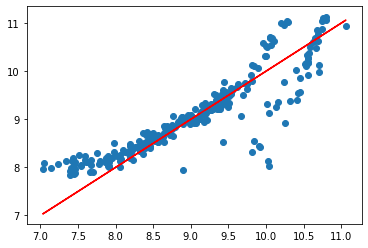

In [28]:
X_test=sm.add_constant(X_test)

predict=result3.predict(X_test)
plt.scatter(Y_test, predict)
plt.plot(Y_test,Y_test, c="r");

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [52]:
X=df[["age","bmi","children","smoker"]]
Y=df.log_charges

In [53]:
X=PolynomialFeatures(degree=2).fit_transform(X)

X=StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

lr4=LinearRegression(normalize=True)
lr4.fit(X_train,Y_train)

y_test_pred=lr4.predict(X_test)
Y_train_pred=lr4.predict(X_train)

# r2_score is used for calculating accuracy of the regression problem
print("Accuracy of the test set: {:.3f}". format(r2_score(Y_test,y_test_pred)))

Accuracy of the test set: 0.858


In [54]:
# Now, we'll apply feature engineering on the dataset

df["bmi_smoker"]=df["bmi"]*df["smoker"]

df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,bmi_smoker
0,19,0,27.900,0,1,0,16884.92400,9.734176,27.9
1,18,1,33.770,1,0,0,1725.55230,7.453302,0.0
2,28,1,33.000,3,0,0,4449.46200,8.400538,0.0
3,33,1,22.705,0,0,1,21984.47061,9.998092,0.0
4,32,1,28.880,0,0,1,3866.85520,8.260197,0.0


In [55]:
X=df.drop(["charges","log_charges"], axis=1)
Y=df.log_charges

In [58]:
X=StandardScaler().fit_transform(X)

X=PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

lr5=LinearRegression(normalize=True)

lr5.fit(X_train,Y_train)

y_test_pred2=lr5.predict(X_test)

print("Accuracy of the test set: {:.3f}". format(r2_score(Y_test,y_test_pred2)))

Accuracy of the test set: 0.858
